# Biological Data Science 2016
# Cold Spring Harbor Laboratory
# 10/26-10/29

## ypar

Abstract lists are available [here](https://meetings.cshl.edu/abstracts.aspx?meet=DATA&year=16)  

First, scrap some tweets  

In [ ]:
%%bash

timepoint=`date +'%Y%m%d%H%M%S'`
t search all '#BioData16' -n 4000 --csv >> biodata16_4000_${timepoint}.csv
t search all '#biodata16' -n 4000 --csv >> biodata16_4000_${timepoint}.csv
t search all '#BIODATA16' -n 4000 --csv >> biodata16_4000_${timepoint}.csv

check file

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
import warnings
warnings.filterwarnings('ignore')

datafile = 'biodata16_4000_20161029114701.csv'
df = pd.read_csv(datafile, sep=',', header=0)

In [2]:
df.head()

,ID,Posted at,Screen name,Text
0,792391419436687360,2016-10-29 15:43:30 +0000,Campbell_JD_,RT @TiffanyTimbers: Heard at #BioData16: the f...
1,792390538913873920,2016-10-29 15:40:01 +0000,EBiederstedt,RT @yosons: Valerie Schneider #BioData16 https...
2,792390187930222592,2016-10-29 15:38:37 +0000,michaelhoffman,Peter DeFord starts by asking for a round of a...
3,792390114911584257,2016-10-29 15:38:19 +0000,rnomics,The latest The RNomics-bioinfo #Paper! https:/...
4,792390089544466433,2016-10-29 15:38:13 +0000,GholsonLyon,RT @sedlazeck: Slides about Sniffles + NGM-LR:...


remove duplicates

In [4]:
df.rename(columns={'Screen name':'user', 'Posted at':'Posted'}, inplace=True)
df = df.drop_duplicates(df, keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621 entries, 0 to 3207
Data columns (total 4 columns):
ID        1621 non-null object
Posted    1621 non-null object
user      1621 non-null object
Text      1621 non-null object
dtypes: object(4)
memory usage: 63.3+ KB


In [5]:
df.to_csv('biodata16_4000_20161029114701.txt', sep='\t', index=False)

remove retweets

In [7]:
df1 = df[~df['Text'].str.startswith('RT @')]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 2 to 3203
Data columns (total 4 columns):
ID        856 non-null object
Posted    856 non-null object
user      856 non-null object
Text      856 non-null object
dtypes: object(4)
memory usage: 33.4+ KB


RT rate is ~ 50% total tweets pulled by three hashtags: #BIODATA16, #biodata16 & #BioData16

In [5]:
df1.reset_index(drop=True, inplace=True)
df1.to_csv('biodata16_4000_20161029114701_no_rt.txt', sep='\t', index=False)

In [8]:
t1 = list(zip(*df1['Posted'].str.split(' ').tolist()))
t1 = pd.DataFrame.from_records(t1).T
t1.head()


,0,1
0,2016-10-29,15:38:37
1,2016-10-29,15:38:19
2,2016-10-29,15:33:56
3,2016-10-29,15:27:01
4,2016-10-29,15:21:53


In [7]:
df1['postdate'] = t1[0]
df1['posttime'] = t1[1]
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 6 columns):
ID          856 non-null object
Posted      856 non-null object
user        856 non-null object
Text        856 non-null object
postdate    856 non-null object
posttime    856 non-null object
dtypes: object(6)
memory usage: 40.2+ KB


,ID,Posted,user,Text,postdate,posttime
0,792390187930222592,2016-10-29 15:38:37 +0000,michaelhoffman,Peter DeFord starts by asking for a round of a...,2016-10-29,15:38:37
1,792390114911584257,2016-10-29 15:38:19 +0000,rnomics,The latest The RNomics-bioinfo #Paper! https:/...,2016-10-29,15:38:19
2,792389010467459072,2016-10-29 15:33:56 +0000,iddux,Happy to have discovered @jessicaseverin demoi...,2016-10-29,15:33:56
3,792387268166254592,2016-10-29 15:27:01 +0000,giessel,.@abarysh: force directed layouts weren't desi...,2016-10-29,15:27:01
4,792385978623287296,2016-10-29 15:21:53 +0000,giessel,.@abarysh w/ beautiful and lucid talk on gene ...,2016-10-29,15:21:53


In [8]:
counts = df1.groupby(['postdate', 'user'])['Text'].agg(len)
counts = counts.reset_index()
counts.rename(columns={'Text':'count'}, inplace=True)
counts.to_csv('biodata16_4000_20161029114701_counts.txt', sep='\t', index=False)

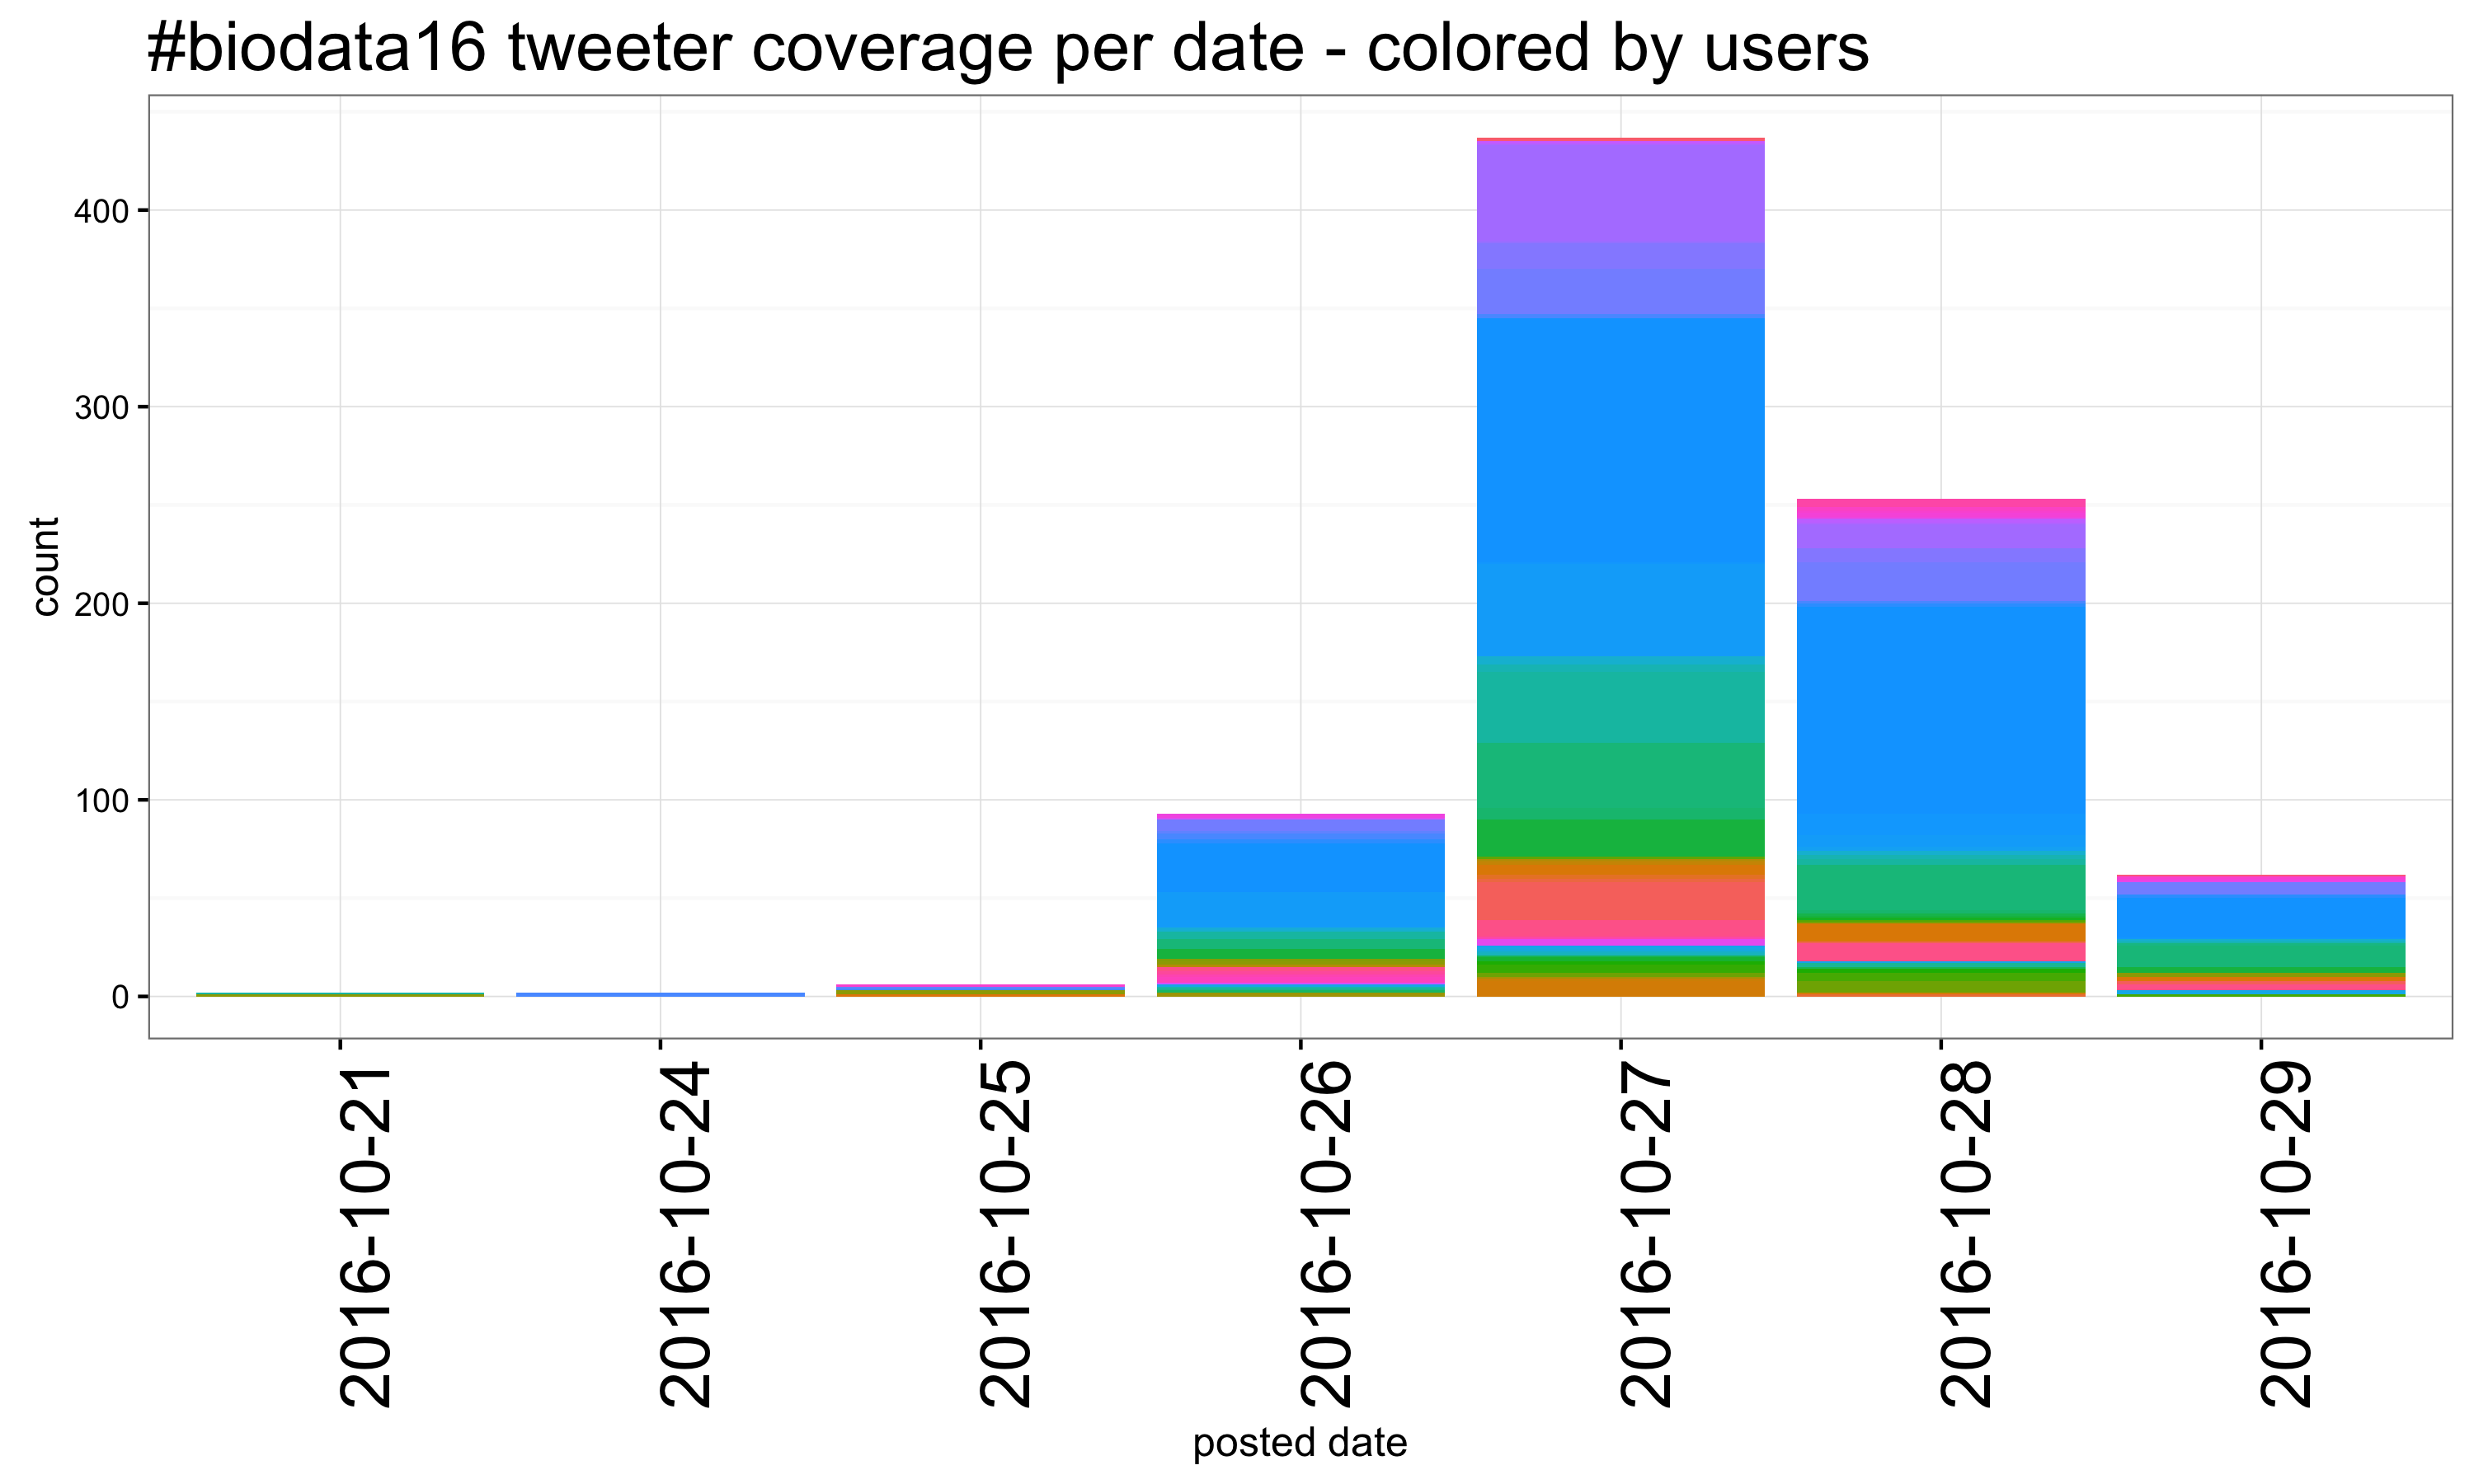

In [9]:
from IPython.display import Image
Image(filename='biodata16_4000_20161029114701_plot_date.png', width=960, height=580) 


people seem to have the most energy + attention span for the second day (above). The similar trend is particularly evident for most users. In fact, most users seemed not have tweeted over 10 times in days other than the 27th.


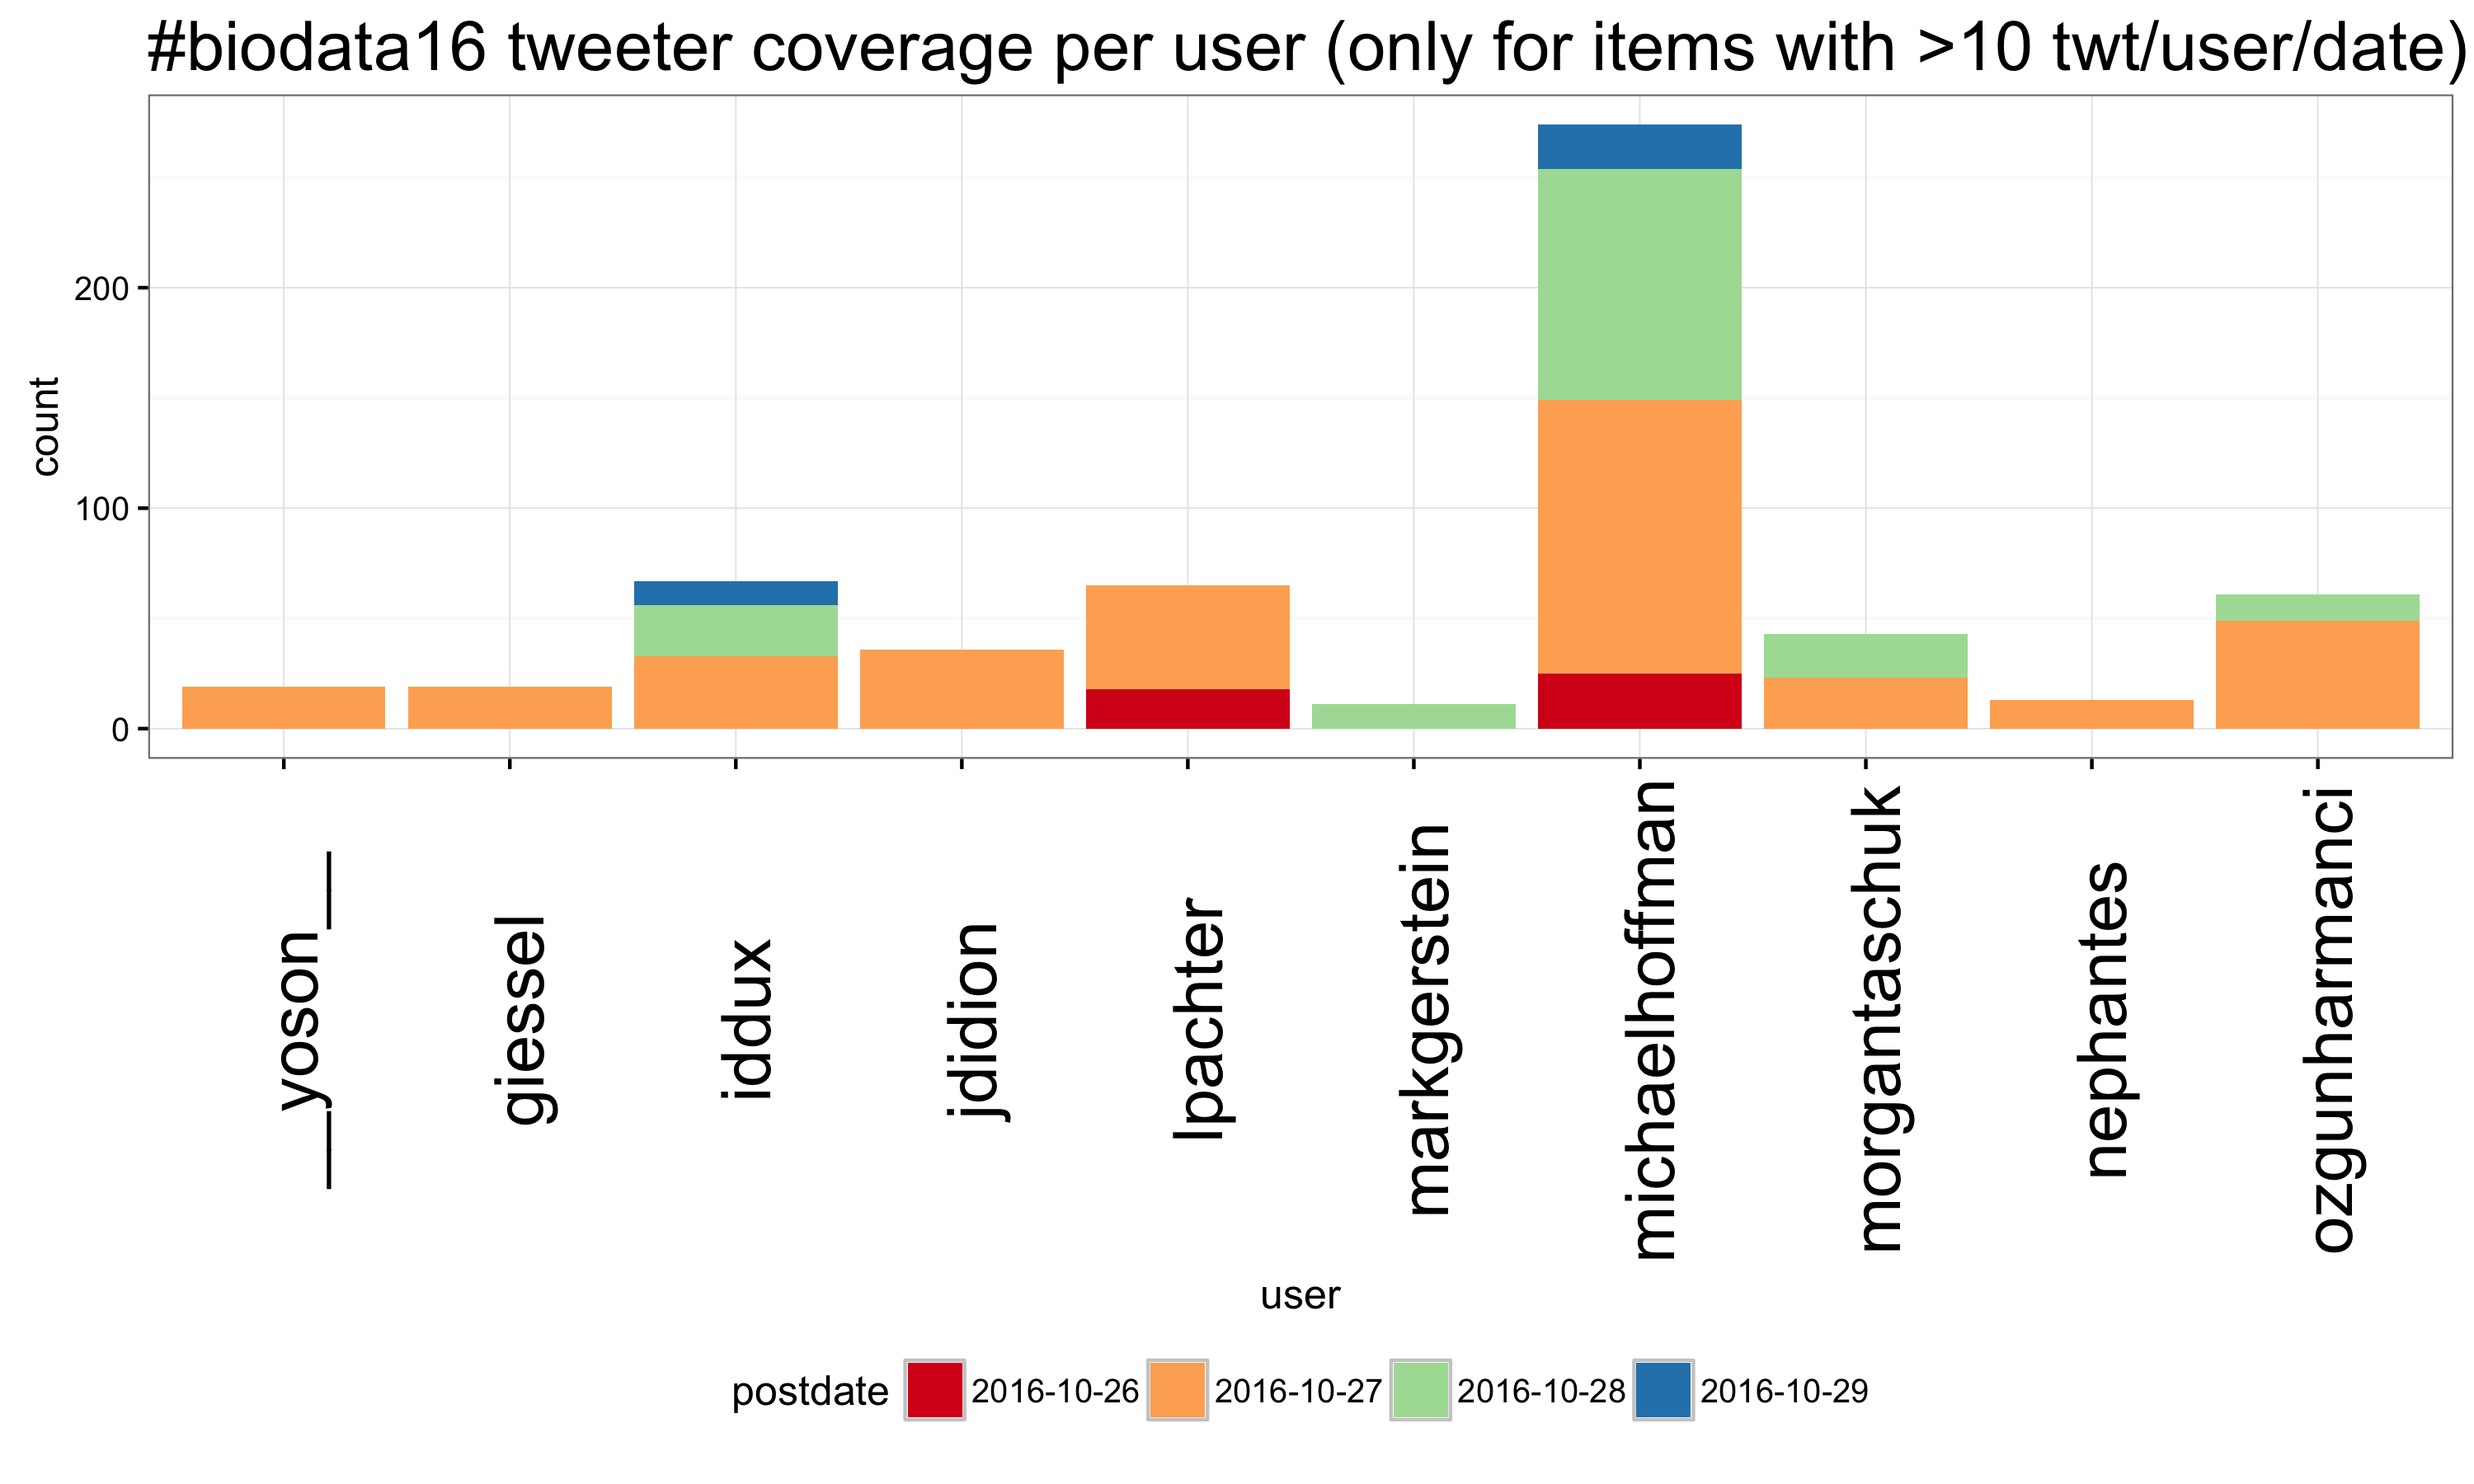

In [10]:
from IPython.display import Image
Image(filename='biodata16_4000_20161029114701_plot_user_min10.png', width=960, height=580) 


In [11]:
date26 = df1[df1['postdate'].str.contains('2016-10-26')]
date26['posttime'] = date26['posttime'].str.replace(':','')
date26.reset_index(drop=True, inplace=True)
date26.to_csv('htt_example_biodata16_20161026.txt', sep='\t', index=False)
date26.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
ID          93 non-null object
Posted      93 non-null object
user        93 non-null object
Text        93 non-null object
postdate    93 non-null object
posttime    93 non-null object
dtypes: object(6)
memory usage: 4.4+ KB


In [12]:
date27 = df1[df1['postdate'].str.contains('2016-10-27')]
date27['posttime'] = date27['posttime'].str.replace(':','')
date27.reset_index(drop=True, inplace=True)
date27.to_csv('htt_example_biodata16_20161027.txt', sep='\t', index=False)
date27.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 6 columns):
ID          437 non-null object
Posted      437 non-null object
user        437 non-null object
Text        437 non-null object
postdate    437 non-null object
posttime    437 non-null object
dtypes: object(6)
memory usage: 20.6+ KB


In [13]:
date28 = df1[df1['postdate'].str.contains('2016-10-28')]
date28['posttime'] = date28['posttime'].str.replace(':','')
date28.reset_index(drop=True, inplace=True)
date28.to_csv('htt_example_biodata16_20161028.txt', sep='\t', index=False)
date28.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
ID          253 non-null object
Posted      253 non-null object
user        253 non-null object
Text        253 non-null object
postdate    253 non-null object
posttime    253 non-null object
dtypes: object(6)
memory usage: 11.9+ KB


In [14]:
date29 = df1[df1['postdate'].str.contains('2016-10-29')]
date29['posttime'] = date28['posttime'].str.replace(':','')
date29.reset_index(drop=True, inplace=True)
date29.to_csv('htt_example_biodata16_20161029.txt', sep='\t', index=False)
date29.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
ID          62 non-null object
Posted      62 non-null object
user        62 non-null object
Text        62 non-null object
postdate    62 non-null object
posttime    50 non-null object
dtypes: object(6)
memory usage: 3.0+ KB


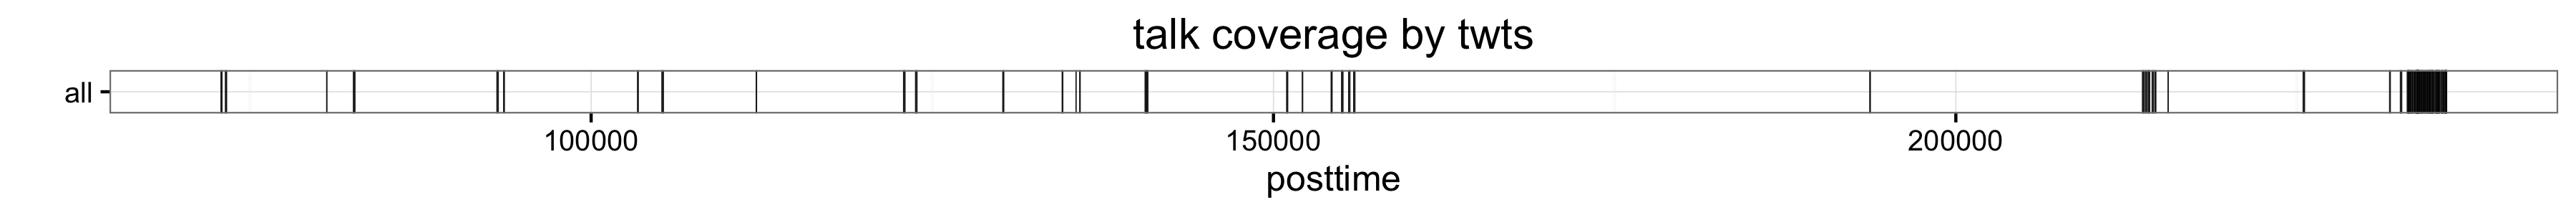

In [15]:
Image('htt_example_biodata16_20161027_plot_coverage.png', width=960, height=90)

In [16]:
date27 = df1[df1['postdate'].str.contains('2016-10-27')]
date27['posttime'] = date27['posttime'].str.replace(':','')
date27['posttime'] = date27['posttime'].astype(int)
date27evening = date27.ix[(date27['posttime']>210000) & (date27['posttime']<240000)]
date27evening.reset_index(drop=True, inplace=True)
date27evening.to_csv('htt_example_biodata16_20161027_evening.txt', sep='\t', index=False)
date27evening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
ID          31 non-null object
Posted      31 non-null object
user        31 non-null object
Text        31 non-null object
postdate    31 non-null object
posttime    31 non-null int64
dtypes: int64(1), object(5)
memory usage: 1.5+ KB


example coverage

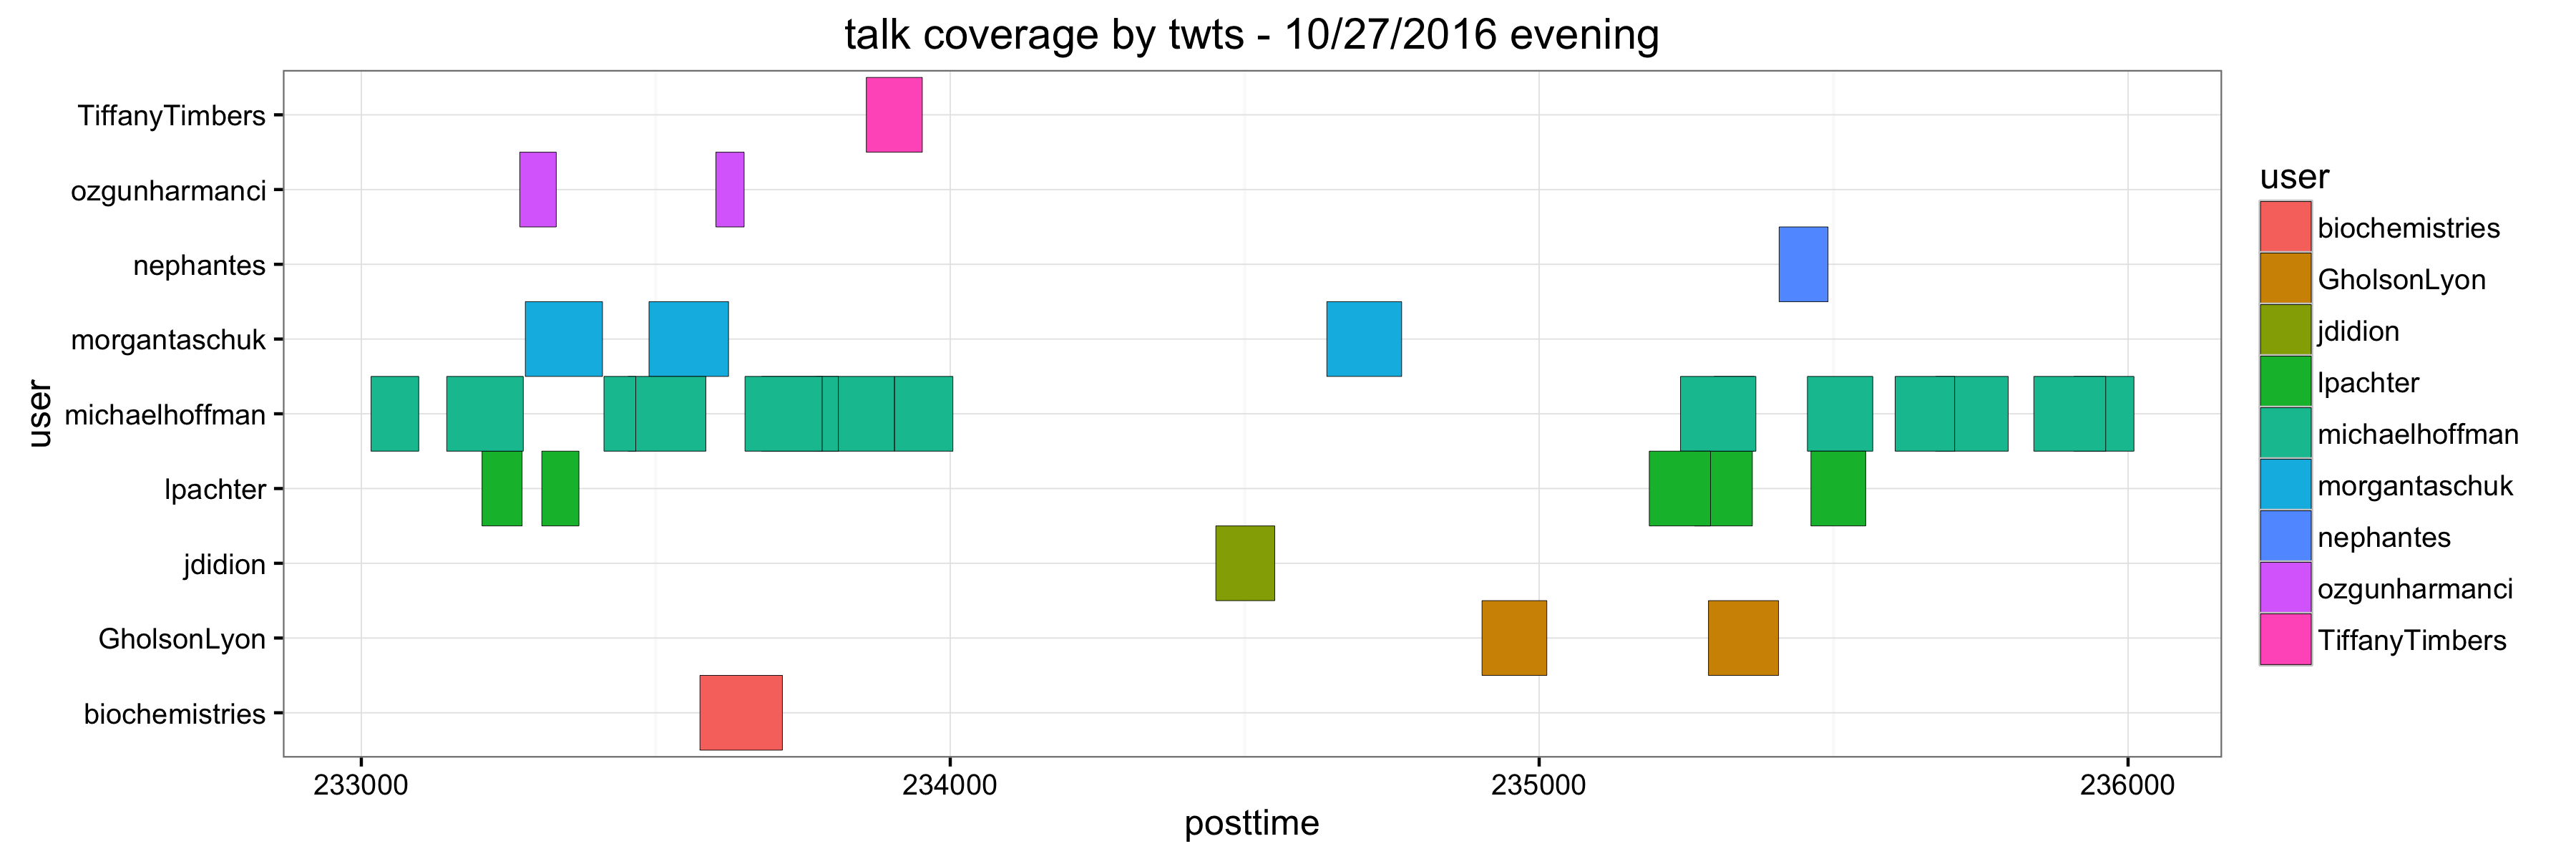

In [17]:
Image('htt_example_biodata16_20161027_plot_coverage_evening.png', width=960, height=240)

obligatory wordcloud

In [ ]:
%%R

library(tm)
library(SnowballC)
library(wordcloud)

df = read.csv('biodata16_4000_20161029114701.txt', sep='\t', header=TRUE)

dfcorpus <- Corpus(VectorSource(df$Text))
tm_map(dfcorpus, PlainTextDocument)
dfcorpus <- tm_map(dfcorpus, removePunctuation)
dfcorpus <- tm_map(dfcorpus, removeWords, stopwords('english'))
#dfcorpus <- tm_map(dfcorpus, stemDocument)
dfcorpus <- tm_map(dfcorpus, removeWords, c('the', 'this', 'like', 'here', 'very', 'what', 'its', stopwords('english')))
pal2 <- brewer.pal(8,"Dark2")

png('biodata16_4000_20161029114701_no_rt_wordcloud.png', width=4, height=4, units='in', res=300)
wordcloud(dfcorpus, max.words = 100, random.order = FALSE, colors=pal2)
dev.off()


png('biodata16_4000_20161029114701_w_rt_wordcloud_100.png', width=4, height=4, units='in', res=300)
wordcloud(dfcorpus, max.words = 100, random.order = FALSE, colors=pal2)
dev.off()


png('biodata16_4000_20161029114701_w_rt_wordcloud_200.png', width=4, height=4, units='in', res=300)
wordcloud(dfcorpus, max.words = 200, random.order = FALSE, colors=pal2)
dev.off()

png('biodata16_4000_20161029114701_w_rt_wordcloud_300.png', width=4, height=4, units='in', res=300)
wordcloud(dfcorpus, max.words = 300, random.order = FALSE, colors=pal2)
dev.off()



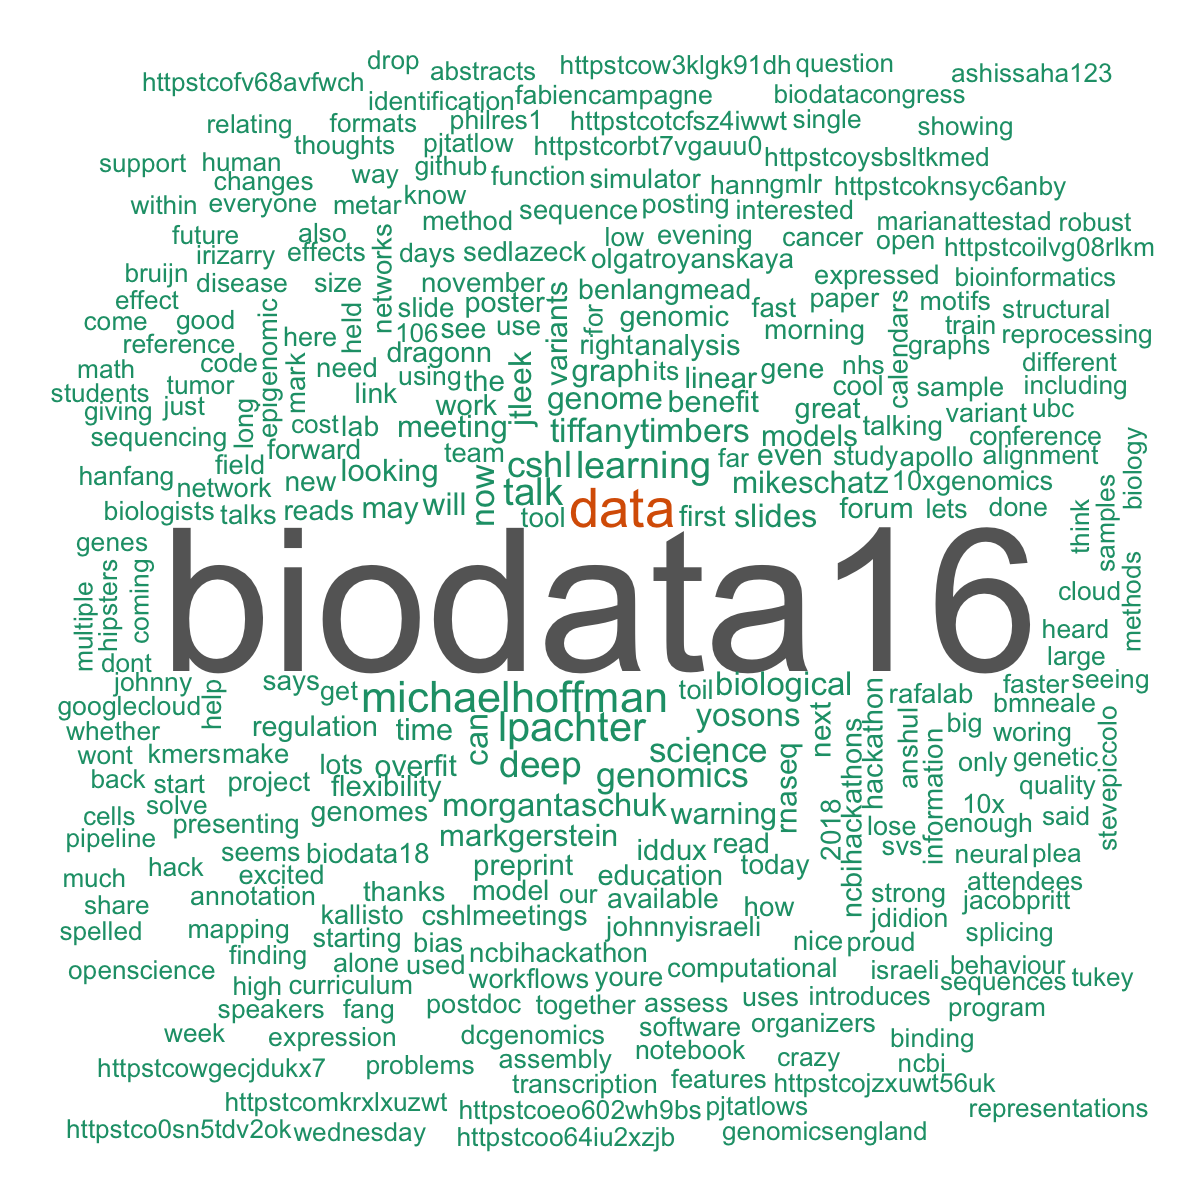

In [18]:
Image('biodata16_4000_20161029114701_w_rt_wordcloud_300.png', width=960, height=960)

Apparently, we don't agree on anything (re: wordcloud font size) except for data